In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Import train and test data from CSV

df_train = pd.read_csv("../data/DailyDelhiClimateTrain.csv", parse_dates=True)
df_test = pd.read_csv("../data/DailyDelhiClimateTest.csv", parse_dates=True)

In [3]:
df_train.head()
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
df_train.describe()
# df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


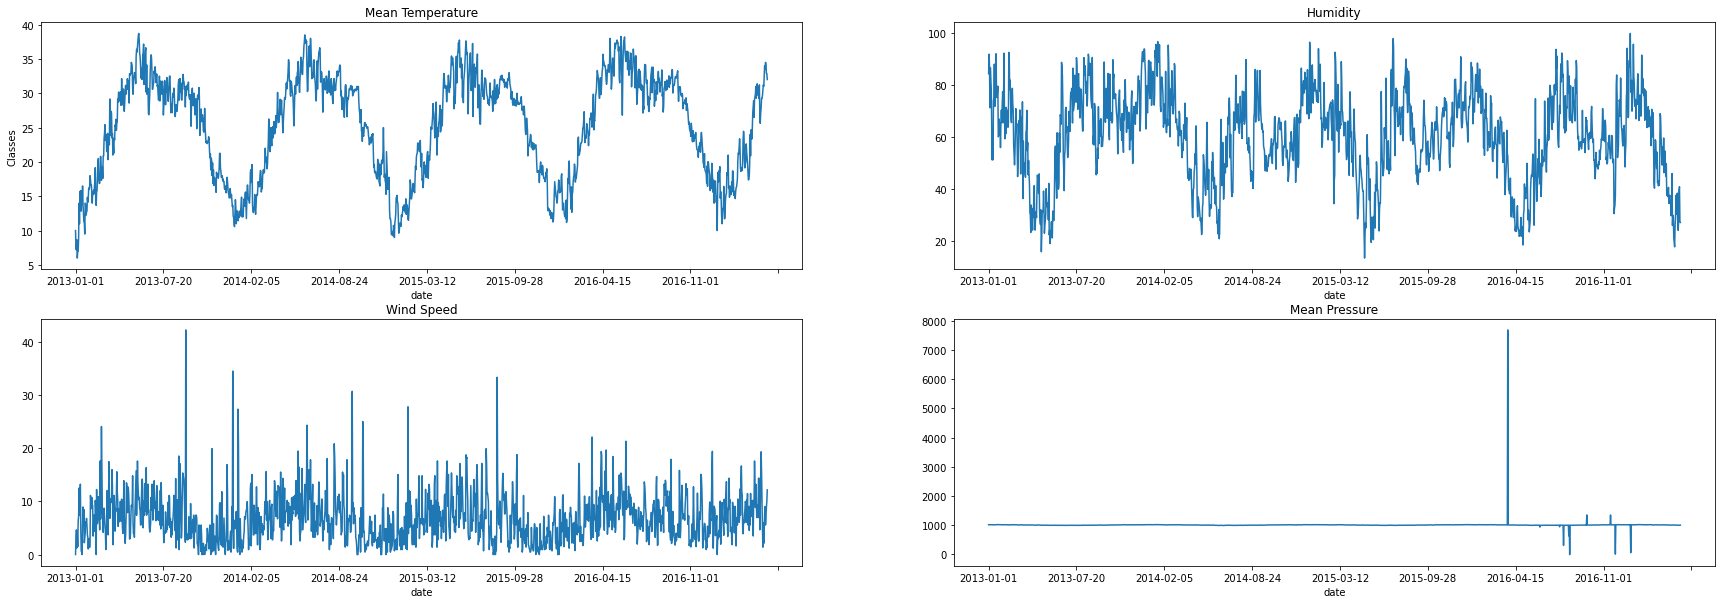

In [4]:
# Visualization of input data before preparation

df_total = df_train.append(df_test)

df_total = df_total.set_index('date')

fig = plt.figure(figsize=(30, 10))
rows = 2
columns = 2

ax1 = fig.add_subplot(rows, columns, 1)
ax1.set_title("Mean Temperature")
plt.ylabel('Classes')
df_total["meantemp"].plot()

ax1 = fig.add_subplot(rows, columns, 2)
ax1.set_title("Humidity")
df_total["humidity"].plot()

ax1 = fig.add_subplot(rows, columns, 3)
ax1.set_title("Wind Speed")
df_total["wind_speed"].plot()

ax1 = fig.add_subplot(rows, columns, 4)
ax1.set_title("Mean Pressure")
df_total["meanpressure"].plot()

plt.show()

In [6]:
# Data preparation

## Detection and removal of outliers
q_low_train = df_train["meanpressure"].quantile(0.01)
q_hi_train  = df_train["meanpressure"].quantile(0.99)

df_filtered_train = df_train[(df_train["meanpressure"] < q_hi_train) & (df_train["meanpressure"] > q_low_train)]

q_low_test = df_test["meanpressure"].quantile(0.01)
q_hi_test  = df_test["meanpressure"].quantile(0.99)

df_filtered_test = df_test[(df_test["meanpressure"] < q_hi_test) & (df_test["meanpressure"] > q_low_test)]



##Normalization
df_filtered_train['meanpressure'] = np.log2(df_filtered_train['meanpressure'])
df_filtered_test['meanpressure'] = np.log2(df_filtered_test['meanpressure'])

df_filtered_test.describe()

/var/folders/sr/zp7gplfs60bd6wccb6xk6w5c0000gn/T/ipykernel_31610/1283757719.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_train['meanpressure'] = np.log2(df_filtered_train['meanpressure'])
/var/folders/sr/zp7gplfs60bd6wccb6xk6w5c0000gn/T/ipykernel_31610/1283757719.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_test['meanpressure'] = np.log2(df_filtered_test['meanpressure'])


,meantemp,humidity,wind_speed,meanpressure
count,110.000000,110.000000,110.000000,110.000000
mean,21.792884,55.878250,8.215765,9.983460
std,6.242458,18.799322,3.595474,0.007802
min,11.000000,17.750000,1.387500,9.965604
25%,16.593750,39.625000,5.642000,9.976947
50%,19.906250,56.937500,8.218750,9.984047
75%,27.705357,70.839674,10.068750,9.989547
max,34.250000,95.833333,19.314286,9.996882
